In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
complete = pd.read_csv(r"C:\Projects\MidMITS\Python\outputs\output\complete.csv",usecols=['msoa', 'LAD', 'County', 'hour_part', 'journey_purpose', 'day','2019 origin','origin Nov_2021'])
LAD = complete.groupby(['LAD','hour_part','journey_purpose','day']).sum()#.drop(['msoa','County'],axis=1)
county = complete.groupby(['County','hour_part','journey_purpose','day']).sum()#.drop(['msoa','LAD'],axis=1)

In [30]:
complete

,msoa,LAD,County,hour_part,journey_purpose,day,origin Nov_2021,2019 origin
0,E02000001,City of London,City and County of the City of London,AM,Commute,Weekday,451.681818,918.571429
1,E02000001,City of London,City and County of the City of London,AM,Other,Weekday,15549.500000,24323.809520
2,E02000001,City of London,City and County of the City of London,IP,Commute,Weekday,5859.318182,15729.833330
3,E02000001,City of London,City and County of the City of London,IP,Other,Weekday,85391.636360,119710.071400
4,E02000001,City of London,City and County of the City of London,OP,Commute,Weekday,15596.363640,53000.738100
...,...,...,...,...,...,...,...,...
135658,W02000423,Cardiff,South Glamorgan,IP,Other,Weekend,8457.166667,7437.594444
135659,W02000423,Cardiff,South Glamorgan,OP,Commute,Weekend,291.000000,624.955556
135660,W02000423,Cardiff,South Glamorgan,OP,Other,Weekend,4985.500000,4963.333333
135661,W02000423,Cardiff,South Glamorgan,PM,Commute,Weekend,217.333333,502.116667


In [10]:
def calc_factor(df:pd.DataFrame):
    df['factor'] = df['origin Nov_2021']/df['2019 origin']
    return df

In [11]:
def no_p_factor(df:pd.DataFrame,group_col:str)->pd.DataFrame:
    grouped = calc_factor(df.groupby([group_col,'hour_part','day']).sum())
    return grouped
    


In [12]:
msoa_p = calc_factor(complete)
LAD_p = calc_factor(LAD)
county_p = calc_factor(county)
msoa = no_p_factor(complete,'msoa')
LAD = no_p_factor(LAD,'LAD')
county = no_p_factor(county,'County')

In [52]:
data = msoa.loc[:,'AM','Weekday']['factor']

In [53]:
data

msoa
E02000001    0.633901
E02000002    0.900747
E02000003    0.986132
E02000004    0.898242
E02000005    0.895250
               ...   
W02000419    1.033956
W02000420    0.882296
W02000421    0.930446
W02000422    0.867976
W02000423    0.884592
Name: factor, Length: 8479, dtype: float64

<AxesSubplot:xlabel='factor', ylabel='Density'>

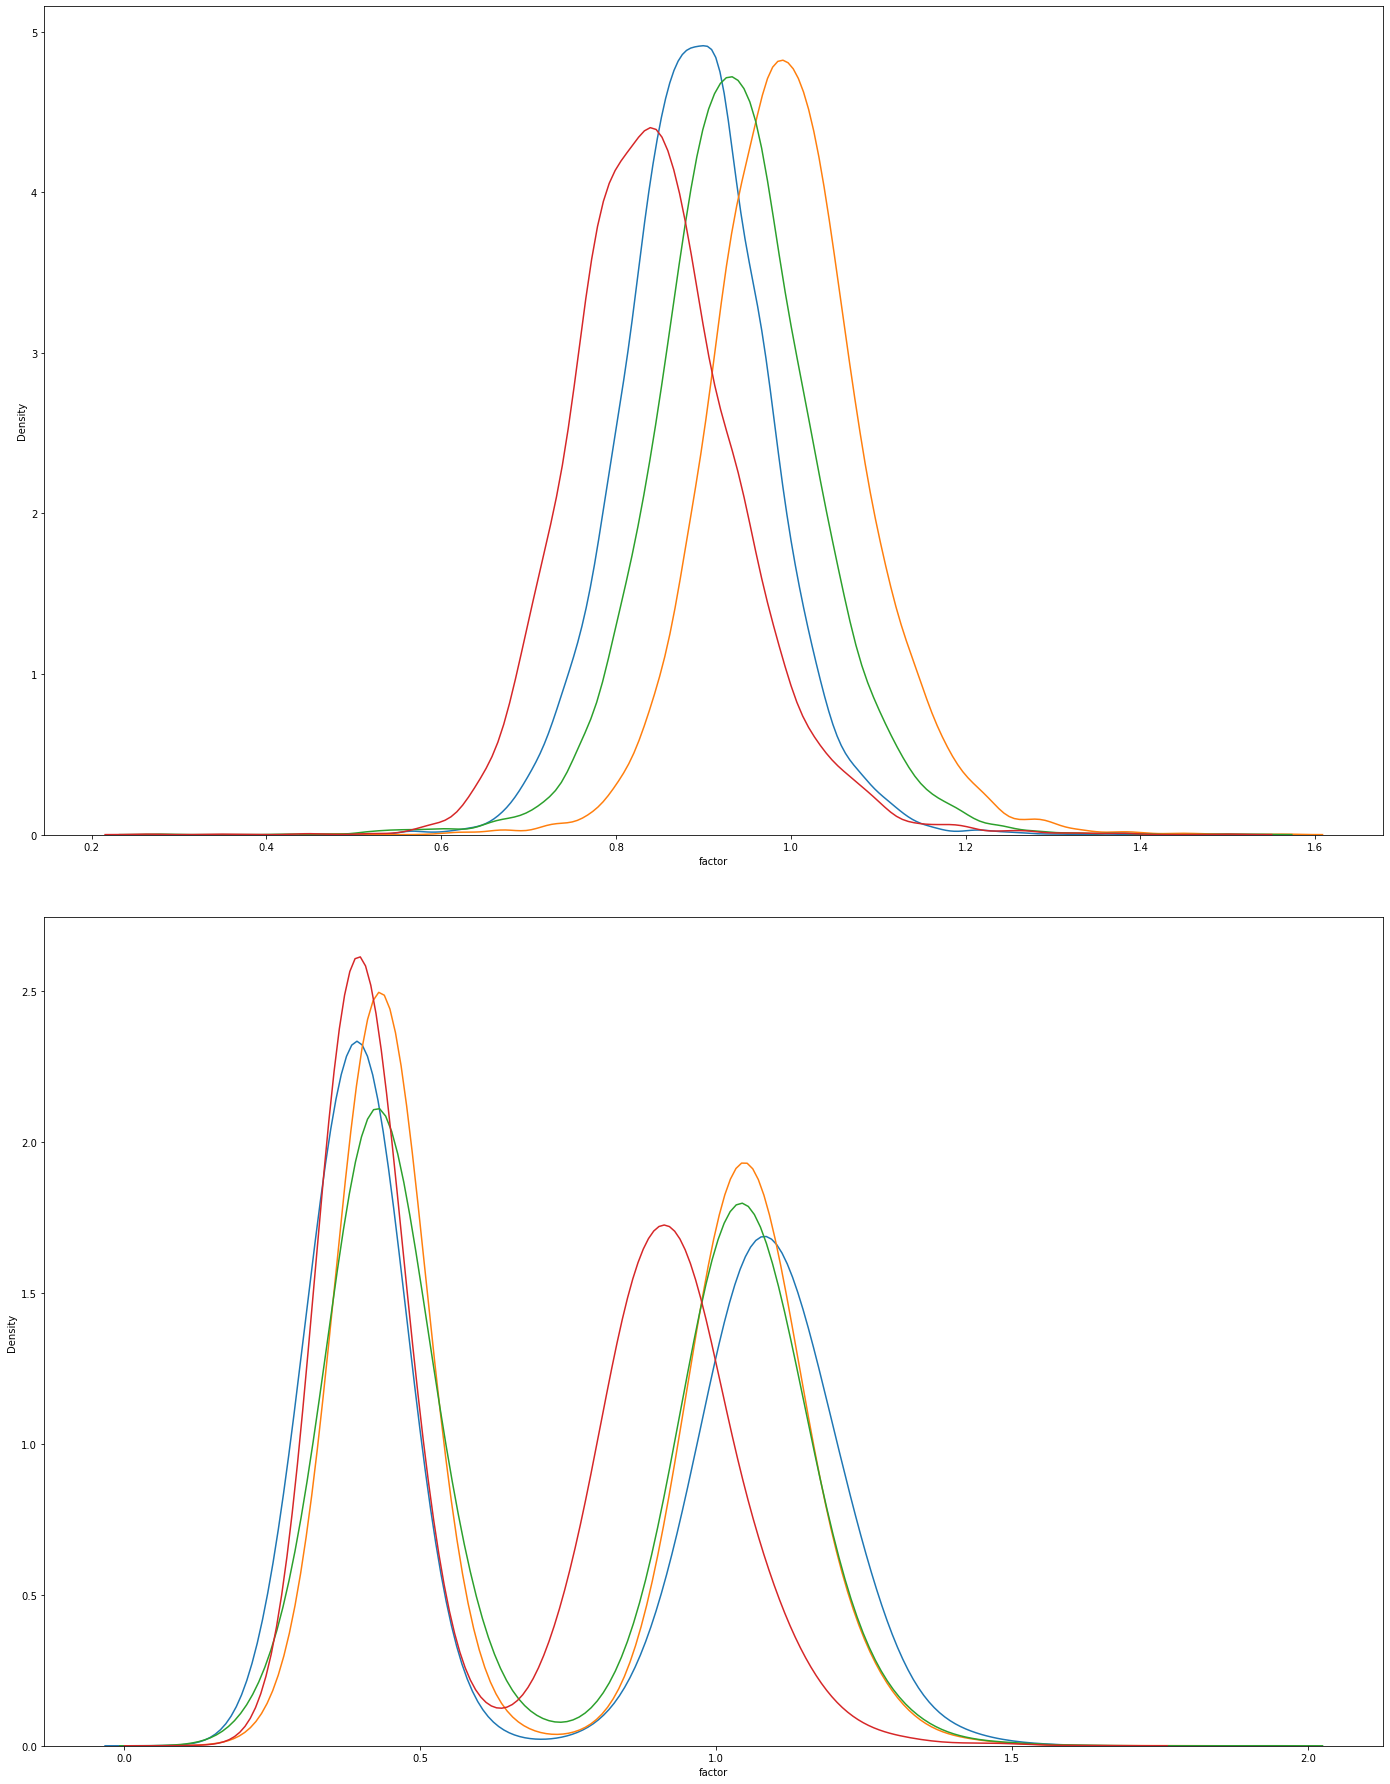

In [55]:
fig = plt.figure(figsize=(24,32))
fig.subplots_adjust(hspace=0.1,wspace=0.1)
ax = fig.add_subplot(2, 1, 1)
data = msoa.loc[:,'AM','Weekday']['factor']
sns.kdeplot(data,ax=ax,cbar=True)
#ax = fig.add_subplot(4, 2, 2)
sns.kdeplot(msoa.loc[:,'IP','Weekday']['factor'],ax=ax,cbar=True)
#ax = fig.add_subplot(4, 2, 3)
sns.kdeplot(msoa.loc[:,'PM','Weekday']['factor'],ax=ax,cbar=True)
#ax = fig.add_subplot(4, 2, 4)
sns.kdeplot(msoa.loc[:,'OP','Weekday']['factor'],ax=ax,cbar=True)
ax = fig.add_subplot(2, 1, 2)
sns.kdeplot(msoa_p.loc[:,'AM','Weekday']['factor'],ax=ax,cbar=True)
#ax = fig.add_subplot(4, 2, 6)
sns.kdeplot(msoa_p.loc[:,'IP','Weekday']['factor'],ax=ax,cbar=True)
#ax = fig.add_subplot(4, 2, 7)
sns.kdeplot(msoa_p.loc[:,'PM','Weekday']['factor'],ax=ax,cbar=True)
#ax = fig.add_subplot(4, 2, 8)
sns.kdeplot(msoa_p.loc[:,'OP','Weekday']['factor'],ax=ax,cbar=True)

In [81]:
LAD_p

origin Nov_2021  \
LAD           hour_part journey_purpose day                        
Aberdeen City AM        Commute         Weekday      6052.772727   
                                        Weekend      1315.533333   
                        Other           Weekday     50043.045458   
                                        Weekend     24717.000000   
              IP        Commute         Weekday      7098.090909   
...                                                          ...   
York          OP        Other           Weekend     45508.666671   
              PM        Commute         Weekday      5308.909091   
                                        Weekend      1525.500000   
                        Other           Weekday     60747.590911   
                                        Weekend     55684.000001   

                                                  2019 origin    factor  
LAD           hour_part journey_purpose day                              
Aberdeen City AM        Commute         Weekday  13790.904762  0.438896  
                                        Weekend   2784.950000  0.472372  
                        Other           Weekday  51488.476190  0.971927  
                                        Weekend  25812.183333  0.957571  
              IP        Commute         Weekday  15392.357144  0.461144  
...                                                       ...       ...  
York          OP        Other           Weekend  44187.050000  1.029910  
              PM        Commute         Weekday  12652.666667  0.419588  
                                        Weekend   2996.833333  0.509037  
                        Other           Weekday  53782.761908  1.129499  
                                        Weekend  50823.450002  1.095636  

[5792 rows x 3 columns]

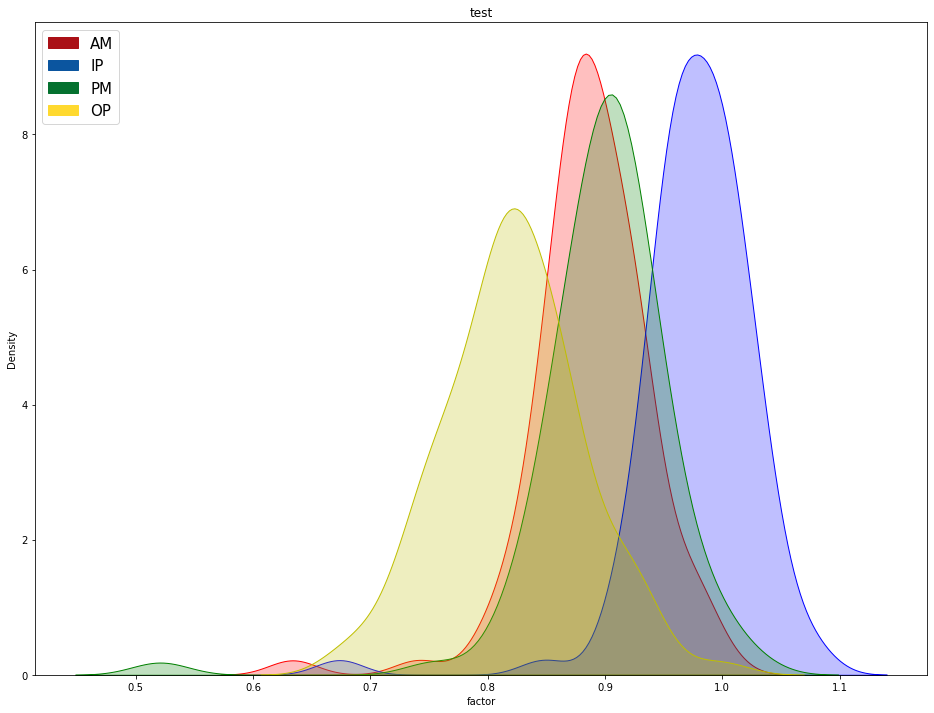

In [19]:
import matplotlib.patches as mpatches

cmaps = {'r':'Reds', 'b':'Blues', 'g':'Greens', 'y':'Set2'}
times = ['AM','IP','PM','OP']

fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(1, 1, 1)
label_patches=[]
for i,j in zip(cmaps.keys(),times):
    data = county.loc[:,j,'Weekday']['factor']
    label = j
    sns.kdeplot(data,color=i,ax=ax,fill=True)
    label_patch = mpatches.Patch(
        color=sns.color_palette(cmaps[i])[5],
        label=label)
    label_patches.append(label_patch)
plt.title('test')
plt.legend(handles=label_patches,loc='upper left',prop={'size':15})
plt.savefig(r'C:\Projects\MidMITS\Python\outputs\county.png')

    

In [4]:
dic1 = {n:'OP' for n in range(1,10)} 
dic2 = {n:'AM' for n in range(10,15)}
dic3 = {**dic1,**dic2}

In [30]:
LAD.loc[:,'PM','Weekday'][LAD['factor']<0.7]

<ipython-input-30-d9970bbf407a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LAD.loc[:,'PM','Weekday'][LAD['factor']<0.7]


TypeError: Expected tuple, got str

In [33]:
LAD[LAD['factor']<0.7]

origin Nov_2021    2019 origin    factor
LAD                hour_part day                                              
Camden             PM        Weekday    142419.090913  213891.452376  0.665848
Cheltenham         OP        Weekday     23261.272727   35268.785714  0.659543
City of London     AM        Weekday     16001.181818   25242.380949  0.633901
                   IP        Weekday     91250.954542  135439.904730  0.673738
                   OP        Weekday     91669.545460  135229.714290  0.677880
                   PM        Weekday    129117.227270  247842.523900  0.520965
Crawley            OP        Weekday     28952.136364   47463.452382  0.609988
                             Weekend     25602.833332   42080.538890  0.608425
Na h-Eileanan Siar AM        Weekend      1090.083333    1619.447222  0.673121
                   OP        Weekday      2523.380952    3673.870222  0.686845
                             Weekend      2175.600000    3200.268056  0.679818
Tower Hamlets      PM        Weekday    111792.090911  163730.023805  0.682783
Westminster        PM        Weekday    287338.954549  416320.476177  0.690187